<div class='alert alert-info'>
    <h1 align="center">Polynomial Regression</h1>
    <h3 align="center">Mohammad Rahdar</h3>
</div>

# Introduction

Polynomial regression is a type of regression analysis used in statistics to model relationships between a dependent variable and one or more independent variables. In polynomial regression, instead of fitting a straight line as in simple linear regression, we fit a polynomial curve to the data.

The general form of a polynomial regression equation with one independent variable (x) is:

$$ y = b + w_1 x + w_2 x^2 + ... + w_n x^n $$

Polynomial regression allows us to capture nonlinear relationships between the independent and dependent variables. By increasing the degree of the polynomial, we can introduce more flexibility into the model, potentially fitting the data more accurately. However, it's important to be cautious about overfitting, where the model fits the training data too closely and doesn't generalize well to new, unseen data.

Polynomial regression can be performed using various techniques, including ordinary least squares (OLS) regression, which minimizes the sum of the squared differences between the observed and predicted values of the dependent variable. Additionally, techniques like gradient descent can also be used for optimization in more complex scenarios.

Implementing polynomial regression with scikit-learn is very similar to linear regression. There’s only one extra step: you need to transform the array of inputs to include nonlinear terms such as $𝑥^2$.

In [1]:
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Input variable (house size) as a 2 dimensional array
X = np.array([1000, 1500, 1200, 1800, 2500, 800,
              1600, 2400, 3100, 3800, 4200, 4500]).reshape(-1,1)

# Target variable (house price) in 1000s of dollars as a 2 dimensional array
y = np.array([100, 230, 180, 180, 170, 120,
              240, 195, 220, 270, 260, 380]).reshape(-1,1)    

Scaling is a common preprocessing step in machine learning to ensure that the features are on the same scale, which can be important for some machine learning algorithms. 
Standardization is a one of the scaling technique wherein it makes the data scale-free by converting the statistical distribution of the data into the a distribution with mean equals to 0, and standard deviation equals to 1.

In [3]:
# Create StandardScaler objects for X
X_scaler = StandardScaler()

# Fit and transform the input feature X
X_scaled = X_scaler.fit_transform(X)

Let's add feature $x^2$ to the model and call this input array as `X2`.

In [4]:
X2 = np.concatenate((X_scaled, X_scaled**2),1)

In [5]:
# Create a linear regression object
reg = LinearRegression()

# Train the model
reg.fit(X2, y)

# Print the regression equation
print('f(x) =',
      '%.4f'      %reg.intercept_,
      '+ %.4fx'   %reg.coef_[0,0],
      '+ %.4fx^2' %reg.coef_[0,1])

# Print R-squared
print('R2 = %.4f' %reg.score(X2, y))

f(x) = 201.5931 + 52.9133x + 10.4902x^2
R2 = 0.6777


The R2 score helps assess how well the model explains the variance in the target variable. It evaluates the performance of a regression model. In other words, R-squared measures how well the independent variables can predict the outcome variable. It ranges from 0 to 1, with higher values indicating a better fit of the model to the data. An R-squared value of 1 means the model perfectly fits the data and there is no difference between the predicted value and actual value. A value of 0 means there is no relationship.

Let's plot the fitted line on the scatter plot.

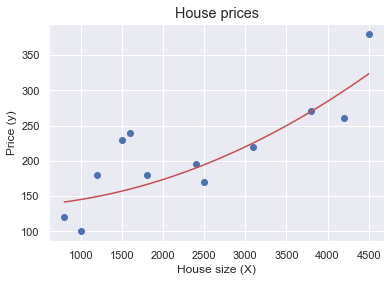

In [6]:
# Generate a range of data points for plotting predictions 
z = np.linspace(min(X), max(X), 100).reshape((-1,1))

# Scale the range of data points
z_scaled = X_scaler.fit_transform(z)

# Add feature x^2 to the model
z2 = np.concatenate((z_scaled, z_scaled**2),1)

# Make predictions using the fitted model on the range of data points
y_pred = reg.predict(z2)

# Plot the data
plt.scatter(X, y, marker='o', c='b', label='Actual data')
plt.plot(z, y_pred, c='r', label='Our prediction')
plt.title('House prices', size='large')
plt.ylabel('Price (y)')
plt.xlabel('House size (X)')
plt.show()

It’s possible to transform the input array in several ways, but the class `PolynomialFeatures` is very convenient for this purpose. `PolynomialFeatures()` generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
* `degree` : int , default=2 - It specifies the maximal degree of the polynomial features.
* `interaction_only` : bool, default=False - If True, only interaction features are produced: features that are products of at most degree distinct input features, i.e. terms with power of 2 or higher of the same input feature are excluded:
   * included: x[0], x[1], x[0] * x[1], etc.
   * excluded: x[0] ** 2, x[0] ** 2 * x[1], etc.
* `include_bias` : bool, default=True - If True (default), then include a bias column, the feature in which all polynomial powers are zero (i.e. a column of ones - acts as an intercept term in a linear model).

You can obtain a very similar result when `include_bias` is `True`. By doing that the intercept is already included with the leftmost column of ones, and you don’t need to include it again when creating the instance of LinearRegression. Thus, you can provide `fit_intercept` = `False` in `LinearRegression()`. You see that now `.intercept_` is zero, but `.coef_` actually contains intercept as its first element. Everything else is the same.

Let's generate polynomial and interaction features through `PolynomialFeatures()` in `sklearn`.

In [7]:
d = 2  # degree of the polynomial features

# Generate polynomial and interaction features
poly = PolynomialFeatures(degree=d, include_bias=False)

# Transform data to polynomial features (new x array)
X_poly = poly.fit_transform(X_scaled)

In [8]:
# Create and fit the regression model by using X_poly features
reg = LinearRegression().fit(X_poly, y)

In [9]:
# Print the result
print('Intercpt:', reg.intercept_)
print('coeficients:', reg.coef_)
print('R2 = %.4f' %reg.score(X_poly, y))

Intercpt: [201.59314901]
coeficients: [[52.913284   10.49018432]]
R2 = 0.6777


If you want to get the predicted response, use `.predict()`, but remember that the argument should be the modified input X_poly instead of the original X. The prediction works almost the same way as in the case of linear regression. It just requires the modified input instead of the original.

In [10]:
y_pred = reg.predict(X_poly)
print('predicted response:\n\n', y_pred)

predicted response:

 [[155.48813899]
 [169.30271224]
 [160.59122952]
 [179.28241127]
 [207.50032801]
 [150.94870016]
 [172.48836566]
 [203.04645828]
 [237.18271781]
 [278.22371061]
 [304.77579081]
 [326.16943666]]


Now, let's fit higher degrees of polynomial function to the data and plot it.

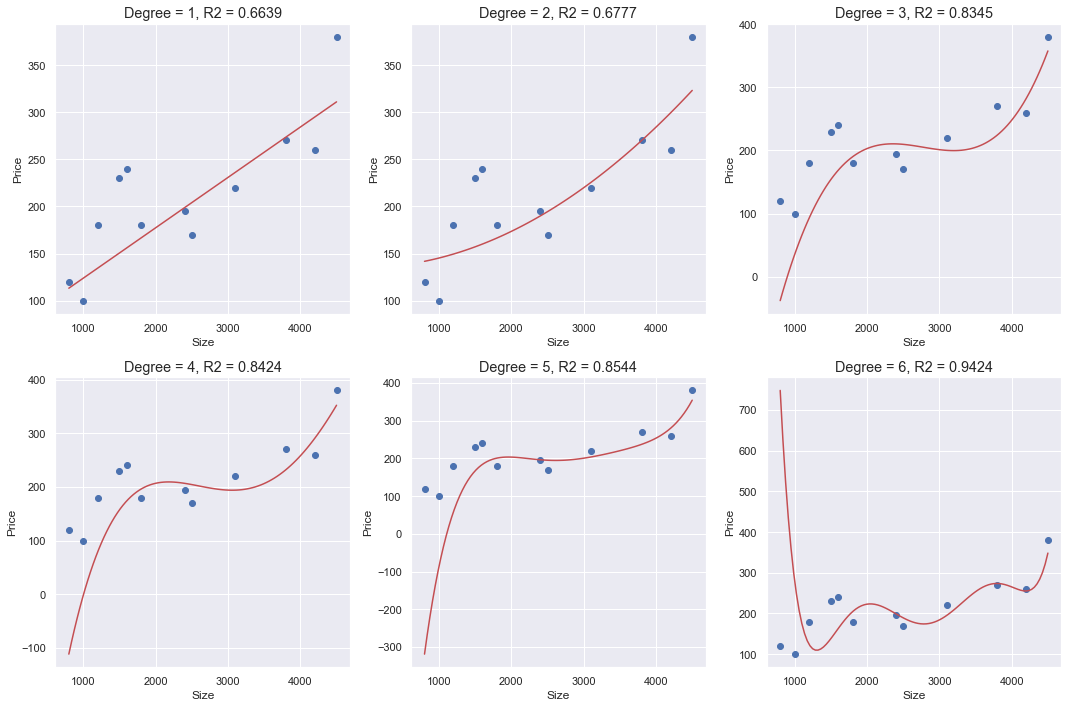

In [11]:
# Create a figure and subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes array for easy indexing
axs = axs.flatten()

# Loop through degrees of polynomial
for d, ax in zip(range(1, 7), axs):
    
    # Transform the original data into polynomial features
    X_poly = PolynomialFeatures(degree=d, include_bias=False).fit_transform(X_scaled)
    
    # Fit polynomial regression model to the transformed data
    reg = LinearRegression().fit(X_poly, y)
    
    # Generate a range of data points for plotting predictions
    z = np.linspace(min(X), max(X), 100).reshape((-1,1))
    
    # Scale the range of data points
    z_scaled = StandardScaler().fit_transform(z)
    
    # Transform the scaled data points into polynomial features
    zd = PolynomialFeatures(degree=d, include_bias=False).fit_transform(z_scaled)
    
    # Make predictions using the fitted model on the range of data points
    z_pred = reg.predict(zd)
    
    # Plot actual data points
    ax.scatter(X, y, marker='o', c='b', label='Actual data')
    
    # Plot the predicted values
    ax.plot(z, z_pred, 'r', label='Our prediction')
    
    # Add labels and title to the subplot
    ax.set_ylabel('Price')
    ax.set_xlabel('Size')
    ax.set_title('Degree = %d, R2 = %.4f' % (d, reg.score(X_poly, y)),
                 size='large')
    
# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Show the plot
plt.show()

When d=1, the fitted line has a low R2, and it is an example of under fitting. On the other hand, when d=6, it is overfitted. Degree of 2 or 3 might be the best degree for modeling this particular data.

To avoid overfiiting with higher degress of polynomial, you can use Ridge regression, which is a linear regression model with L2 regularization. Ridge regression adds a penalty term to the ordinary least squares objective function, which helps to prevent overfitting by discouraging large coefficients.

To do this you can import `Ridge` from `sklearn.linear_model`, and use `'Ridge(alpha=0.1)'` instead of `'LinearRegression()'` to create the Ridge regression model with a regularization parameter (alpha) of 0.1. Adjust the value of alpha as needed to control the strength of regularization.

```python
from sklearn.linear_model import Ridge
reg = Ridge(alpha=1).fit(X_poly, y)
```